## 1. Preprocessing Dataset

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# read dataset
data = pd.read_csv('../data/SurveyData.csv', index_col=0)
df = pd.DataFrame(data)
print(df.dtypes)
print("------------------------------------------------------")
print(df.isnull().sum())  # no missing values
df.head()


q_000     int64
q_001     int64
q_003     int64
q_004     int64
q_005     int64
          ...  
q_121     int64
q_123    object
q_125    object
q_126     int64
q_130    object
Length: 90, dtype: object
------------------------------------------------------
q_000    0
q_001    0
q_003    0
q_004    0
q_005    0
        ..
q_121    0
q_123    0
q_125    0
q_126    0
q_130    0
Length: 90, dtype: int64


,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_116,q_117,q_118,q_119,q_120,q_121,q_123,q_125,q_126,q_130
0,100,2,1,1,1,1,1,1,1,5,...,5,4,2,2,5,2,urban,male,6,NSW
1,89,2,0,0,0,1,0,1,1,5,...,3,4,2,2,2,2,urban,female,3,VIC
2,86,1,1,1,0,0,0,1,0,2,...,4,4,3,3,2,1,urban,female,2,NSW
3,85,2,0,1,0,1,0,0,0,3,...,4,4,3,2,2,1,urban,male,2,NT
4,71,1,0,1,0,1,0,1,0,2,...,4,5,3,2,3,1,urban,male,2,VIC


### 1.1 Preprocessing independent variables

In [2]:
# 1. Rescale q_000, so that values are within the range [0, 1]
df['q_000'] = (df['q_000'] - df['q_000'].min()) / (df['q_000'].max() - df['q_000'].min())
df.head(10)



,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_116,q_117,q_118,q_119,q_120,q_121,q_123,q_125,q_126,q_130
0,1.00,2,1,1,1,1,1,1,1,5,...,5,4,2,2,5,2,urban,male,6,NSW
1,0.89,2,0,0,0,1,0,1,1,5,...,3,4,2,2,2,2,urban,female,3,VIC
2,0.86,1,1,1,0,0,0,1,0,2,...,4,4,3,3,2,1,urban,female,2,NSW
3,0.85,2,0,1,0,1,0,0,0,3,...,4,4,3,2,2,1,urban,male,2,NT
4,0.71,1,0,1,0,1,0,1,0,2,...,4,5,3,2,3,1,urban,male,2,VIC
5,0.73,2,0,1,1,0,0,0,0,2,...,3,4,3,3,3,1,urban,male,3,NSW
6,0.72,2,1,0,1,1,0,0,0,2,...,3,4,3,2,3,1,urban,male,2,VIC
7,0.81,2,1,0,0,0,1,0,0,2,...,3,5,3,2,3,3,regional,female,1,NSW
8,0.42,2,1,0,0,1,0,0,0,3,...,4,2,3,3,3,3,urban,female,1,NSW
9,0.34,1,0,0,0,0,0,1,0,4,...,4,4,2,2,3,1,regional,female,2,NSW


In [3]:
from sklearn.preprocessing import OneHotEncoder

# 2. One-hot encode the categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# transformed dataframe
cat_vars = ['q_123', 'q_125', 'q_130']
t_data = encoder.fit_transform(df[cat_vars])
t_df = pd.DataFrame(t_data, columns=encoder.get_feature_names_out(cat_vars))
df = pd.concat([df, t_df], axis=1).drop(columns=cat_vars)
df.iloc[:, -18:].head(10)

,q_120,q_121,q_126,q_123_regional,q_123_rural,q_123_urban,q_125_female,q_125_male,q_125_none,q_125_other,q_130_ACT,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA
0,5,2,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3,1,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,3,3,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3,3,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2 Inspect dependent variable and preprocess for prediction

In [4]:
cols = ['q_031'] + [f'q_0{i}' for i in range(45, 55)]
# From scanning, we can see some responses of q_031 are 'yes' even though all participation roles are 'no'. These would require attention
data[cols].head(30)

,q_031,q_045,q_046,q_047,q_048,q_049,q_050,q_051,q_052,q_053,q_054
0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,1,0,0
3,1,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,1,1,0,0,0,0
5,1,0,0,1,0,0,0,1,1,0,0
6,1,0,0,1,0,0,0,0,0,1,1
7,1,0,0,1,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,0


In [5]:
"""
import sys
sys.path.append('../utils')
from utils import DataLoader

# Convert to DataFrame
data_loader = DataLoader()


# filter the columns
cols = ['q_031'] + [f'q_0{i}' for i in range(45, 55)]
df = df[cols]

# Define the independent variables (X) and the dependent variable (y)
X = df.drop('q_031', axis=1)
y = df['q_031']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

X_train, y_train = data_loader.oversample(X_train, y_train)
# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Feature importance
feature_importances = clf.feature_importances_

# Output the model's performance and feature importances
print(accuracy)
print("------------------------------------------------------")
print(report)
print("------------------------------------------------------")
print(feature_importances)
"""

'\nimport sys\nsys.path.append(\'../utils\')\nfrom utils import DataLoader\n\n# Convert to DataFrame\ndata_loader = DataLoader()\n\n\n# filter the columns\ncols = [\'q_031\'] + [f\'q_0{i}\' for i in range(45, 55)]\ndf = df[cols]\n\n# Define the independent variables (X) and the dependent variable (y)\nX = df.drop(\'q_031\', axis=1)\ny = df[\'q_031\']\n\n# Split the dataset into training and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)\n\nX_train, y_train = data_loader.oversample(X_train, y_train)\n# Initialize and train a RandomForestClassifier\nclf = RandomForestClassifier(n_estimators=100, random_state=42)\nclf.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = clf.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred)\nreport = classification_report(y_test, y_pred, zero_division=0)\n\n# Feature importance\nfeature_importances = clf.feature_importances_\n\n# Output the model\'s per

### 1.3 Falsification on q_031

In [6]:
from matplotlib import pyplot as plt
# Define role columns (q_45 to q_54)
role_columns = [f'q_0{i}' for i in range(45, 55)]

# Calculate the hypothetical score based on equal weights for roles
# For now just sum the responses in role columns
df['invol_score'] = df[role_columns].sum(axis=1)

# For simplicity, consider any positive score as indicating a "yes" to q_31 in this hypothetical scenario
df['q_031_adjusted'] = df['invol_score'].apply(lambda x: 1 if x > 0 else 0)

# q_31_adjusted represents the adjusted q_31 values based on the simple situation
display_cols = ['q_031'] + role_columns + ['invol_score', 'q_031_adjusted']
df[display_cols]


,q_031,q_045,q_046,q_047,q_048,q_049,q_050,q_051,q_052,q_053,q_054,invol_score,q_031_adjusted
0,1,0,0,0,0,1,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,1,0,0,3,1
3,1,0,0,1,1,0,0,1,0,0,0,3,1
4,1,0,0,1,0,1,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1,0,1,0,0,0,0,0,0,1,0,2,1
871,1,0,0,0,0,0,0,0,0,0,0,0,0
872,1,1,0,0,0,0,0,0,0,0,0,1,1
873,1,0,0,1,0,0,0,1,0,0,0,2,1


In [7]:
frequency = df['invol_score'].value_counts()
frequency = frequency.sort_index()
frequency

0     36
1    133
2    243
3    405
4     34
5     15
6      5
7      4
Name: invol_score, dtype: int64

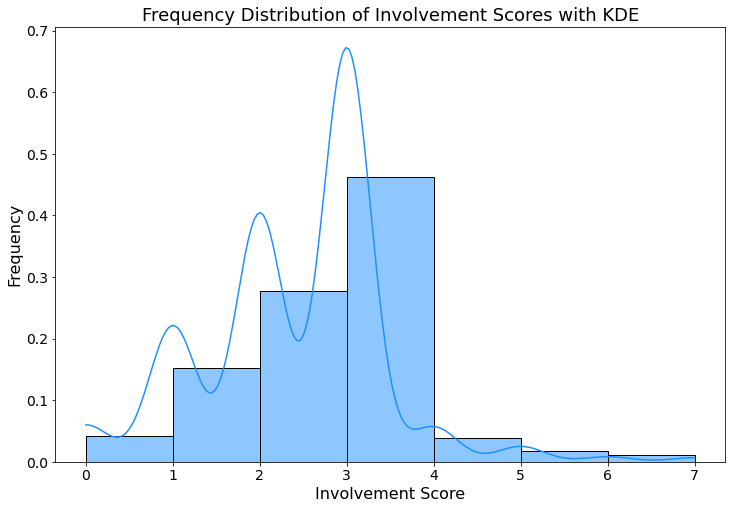

In [8]:
import seaborn as sns
df['invol_score']
# Create a figure with a histogram and a KDE plot
plt.figure(figsize=(12, 8))

# Plot histogram
sns.histplot(df['invol_score'], bins=7, kde=True, color='dodgerblue', stat='density')
# Add title and labels
plt.title('Frequency Distribution of Involvement Scores with KDE', fontsize=18)
plt.xlabel('Involvement Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show plot
plt.show()

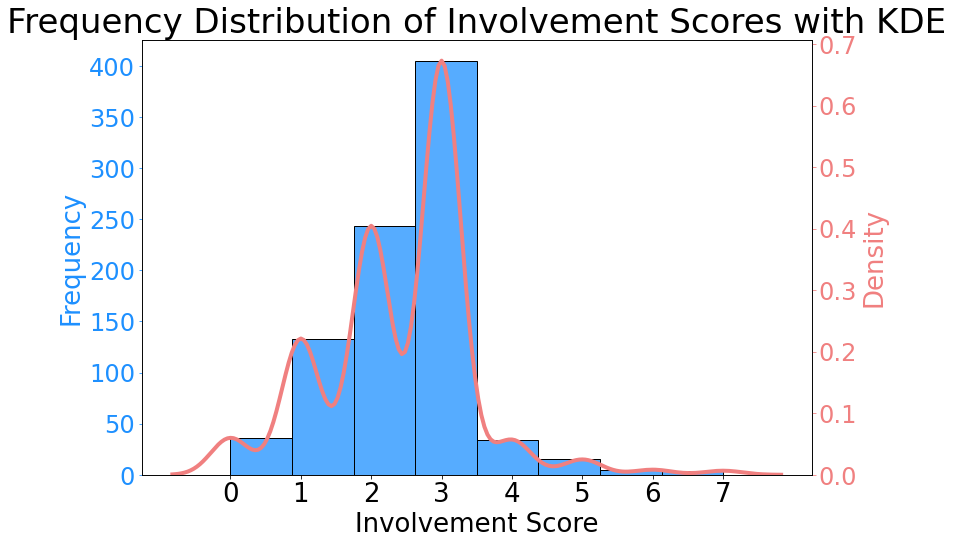

In [16]:
# Create a figure with a histogram and a KDE plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot histogram with frequency normalization
sns.histplot(df['invol_score'], bins=8, kde=False, color='dodgerblue', ax=ax1)

# Add title and labels to the left y-axis (Frequency)
ax1.set_title('Frequency Distribution of Involvement Scores with KDE', fontsize=34)
ax1.set_xlabel('Involvement Score', fontsize=26)
ax1.set_ylabel('Frequency', color='dodgerblue', fontsize=26)

# Explicitly set x-axis ticks to ensure all involvement scores are displayed
ax1.set_xticks(range(0, 8))

# Set the font size for y-axis ticks on the left axis
ax1.tick_params(axis='y', labelsize=24, colors='dodgerblue')
ax1.tick_params(axis='x', labelsize=26)  # Set x-axis tick font size

# Create a secondary y-axis for the KDE plot
ax2 = ax1.twinx()

# Plot KDE on the secondary y-axis (Density)
sns.kdeplot(df['invol_score'], color='lightcoral', ax=ax2, lw=4)

# Add labels to the right y-axis (Density)
ax2.set_ylabel('Density', color='lightcoral', fontsize=26)

# Set the font size for y-axis ticks on the right axis
ax2.tick_params(axis='y', labelsize=24, colors='lightcoral')

# Show plot
plt.show()

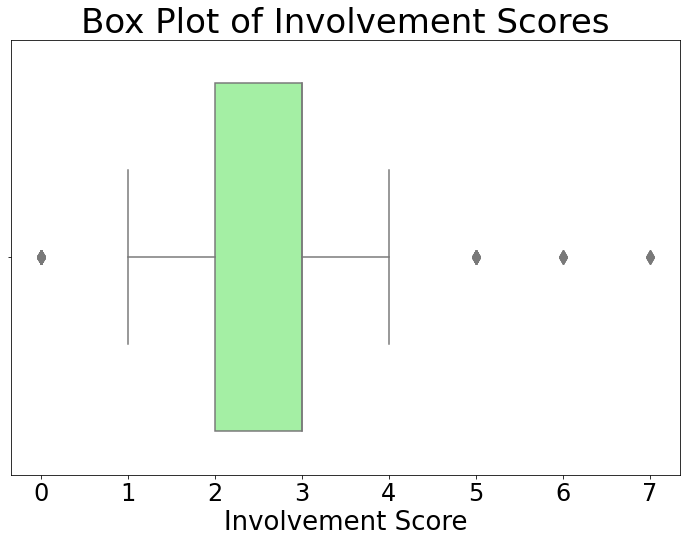

In [20]:
# Create a box plot for additional visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['invol_score'], color='palegreen', flierprops={'markersize':10})

# Add title and labels
plt.title('Box Plot of Involvement Scores', fontsize=34)
plt.xlabel('Involvement Score', fontsize=26)
plt.xticks(fontsize=24)

# Show plot
plt.show()

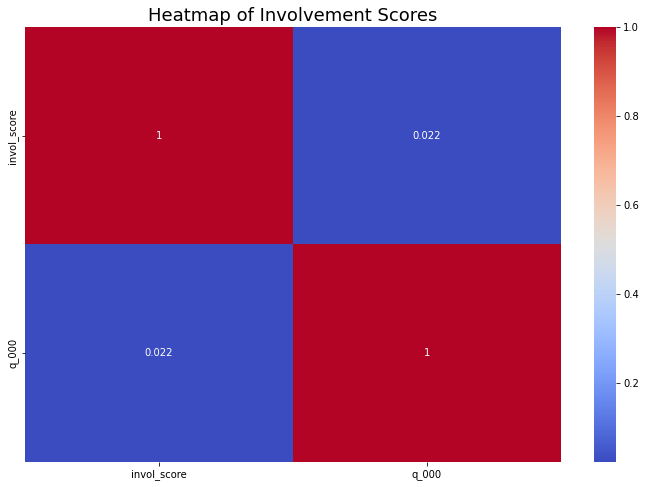

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['invol_score', 'q_000']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Involvement Scores', fontsize=18)
plt.show()

Define participation 
Low: 0-2, Medium 3, High 4-7

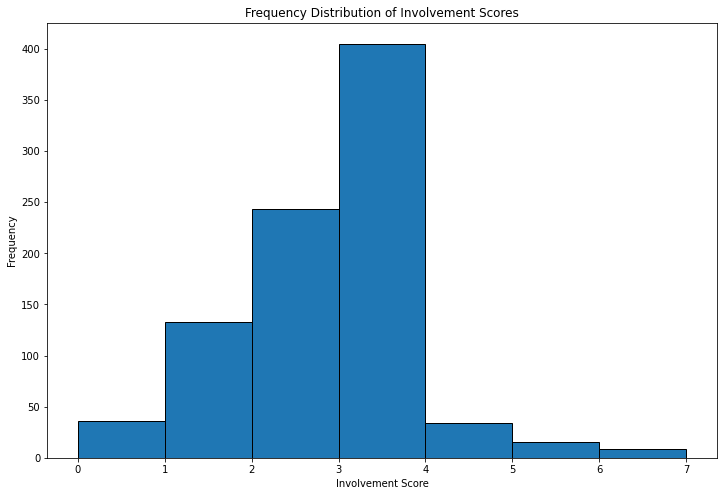

In [12]:
# frequency distribution of scores
plt.figure(figsize=(12, 8))
df['invol_score'].hist(bins=range(int(df['invol_score'].max() + 1)), edgecolor='black')
plt.title('Frequency Distribution of Involvement Scores')
plt.xlabel('Involvement Score')
plt.ylabel('Frequency')
plt.xticks(range(int(df['invol_score'].max() + 1)))  # Ensures integer ticks on the x-axis
plt.grid(False)  # Optionally turn off the grid if preferred
plt.show()

In [13]:
# inspect the preprocessed df
df

,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_130_ACT,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA,invol_score,q_031_adjusted
0,1.00,2,1,1,1,1,1,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.89,2,0,0,0,1,0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,0.86,1,1,1,0,0,0,1,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,0.85,2,0,1,0,1,0,0,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1
4,0.71,1,0,1,0,1,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.62,1,1,0,1,0,0,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
871,1.00,0,1,1,1,1,1,1,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
872,1.00,2,1,1,1,1,1,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
873,1.00,3,1,1,1,1,1,1,1,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1


### 1.4 Incorporate involvement scores for involvement levels 

In [14]:
import numpy as np

"""Define labelling function."""
def involvement_map(score):
    if (score >= 0 and score < 3):
        return "Low"
    elif (score == 3):
        return "Medium"
    elif (score > 3):
        return "High"
    else:
        return "Unknown"
    
df["involvement_level"] = df["invol_score"].apply(involvement_map)
print(df["involvement_level"].value_counts())
df.to_csv("../preprocessed/clean_survey.csv", index=False)

Low       412
Medium    405
High       58
Name: involvement_level, dtype: int64
